In [1]:
#!/usr/bin/env python
#coding=utf-8

import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import StringIO

In [2]:
cwd='/home/user/zhy/my_tensorflow/data/'
classes={'beach','bus'}
writer= tf.python_io.TFRecordWriter("train.tfrecords")

for index,name in enumerate(classes):
    class_path=cwd+name+'/'
    for img_name in os.listdir(class_path):
        img_path=class_path+img_name
        img=Image.open(img_path)
        img= img.resize((100,100))
        img_raw=img.tobytes()
        # plt.imshow(img) # if you want to check you image,please delete '#'
        # plt.show()
        example = tf.train.Example(features=tf.train.Features(feature={
            "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
            'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
        }))
        writer.write(example.SerializeToString())

writer.close()

In [3]:
def read_and_decode(filename): # read iris_contact.tfrecords

    filename_queue = tf.train.string_input_producer([filename])# create a queue
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)#return file_name and file
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string),
                                       })#return image and label

    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.reshape(img, [100, 100, 1])  #reshape image to 512*80*3
    img = tf.cast(img, tf.float32) * (1. / 255) - 0.5 #throw img tensor
    label = tf.cast(features['label'], tf.int32) #throw label tensor
    return img, label

In [4]:
filename_queue = tf.train.string_input_producer(["train.tfrecords"])
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)   #return file and file_name
features = tf.parse_single_example(serialized_example,
                                   features={
                                       'label': tf.FixedLenFeature([], tf.int64),
                                       'img_raw' : tf.FixedLenFeature([], tf.string),
                                   })
image = tf.decode_raw(features['img_raw'], tf.uint8)
image = tf.reshape(image, [100, 100, 1])
label = tf.cast(features['label'], tf.int32)
with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(10):
        example, l = sess.run([image,label])#take out image and label
        # img=Image.fromarray(example, 'RGB')
        img.save(cwd+str(i)+'_''Label_'+str(l)+'.jpg')#save image
        print(example, l)
    coord.request_stop()
    coord.join(threads)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


(array([[[171],
        [187],
        [154],
        ..., 
        [193],
        [173],
        [152]],

       [[188],
        [188],
        [148],
        ..., 
        [187],
        [167],
        [145]],

       [[170],
        [168],
        [139],
        ..., 
        [172],
        [151],
        [128]],

       ..., 
       [[121],
        [122],
        [129],
        ..., 
        [122],
        [119],
        [139]],

       [[151],
        [152],
        [156],
        ..., 
        [158],
        [157],
        [169]],

       [[183],
        [177],
        [171],
        ..., 
        [178],
        [180],
        [185]]], dtype=uint8), 0)
(array([[[246],
        [209],
        [228],
        ..., 
        [218],
        [213],
        [233]],

       [[239],
        [201],
        [219],
        ..., 
        [209],
        [205],
        [226]],

       [[211],
        [171],
        [188],
        ..., 
        [179],
        [176],
        [198]],

       ..., 
 

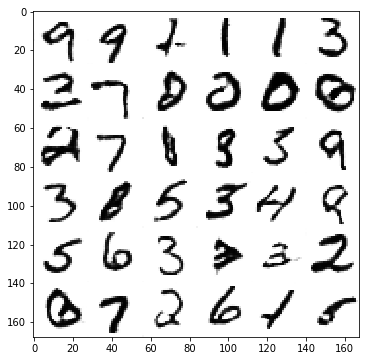